## **Regresión Polinomial**

Que pasa si tus datos son mucho más complejos que sólo un línea recta? o bien son lo bastante complejos como para que no puedan ser descritos por un modelo múltiple lineal? Sorprendentemente en esta sección aprenderemos como podemos usar un **modelo lineal** para ajustarlo a datos **no lineales**. La forma de hacer esto es por medio de potencias de cada característica y añadirlas para obtener lo que se conoce como un **modelo lineal extendido** denominado **regresión polinomial**.

$y = \theta_{o}+\theta_{1}x+\theta_{2}x^{2}+...+\theta_{n}x^{n}$

El cual puede ser fácilmente interpretado como tener $n$ nuevas características y que matemáticamente queda descrito como le sigue:

$y = \theta_{o}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$

donde: 

*   $x_{1} = x$
*   $x_{2} = x^{2}$
*   $x_{n} = x^{n}$

Renombrando estas variables, somos capaces de rescatar el modelo múltiple lineal en la solución de problemas no lineales. Para ello emplearemos nuevamente la librería `sklearn`

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#plt.rcParams['font.size'] = 24
#plt.style.use('seaborn-poster')

def modelpoly(X, theta, degree = 2):
  model = theta[0]
  for i in range(degree):
    model = model + theta[i+1]*X**(i+1)
  return(model)

In [11]:
np.random.seed(1)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # Tranforma la variable original en un vector que contiene la misma variable y el cuadrado de esta
print(X[0])

[-0.49786797]


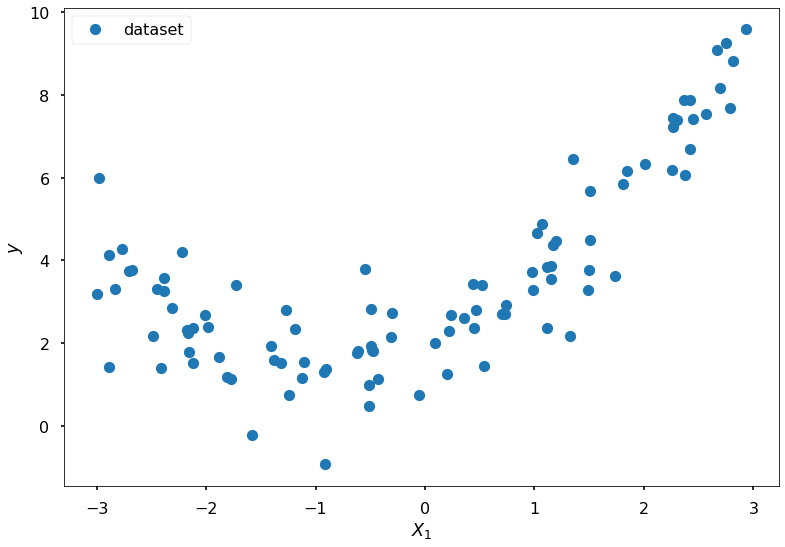

In [12]:
plt.plot(X, y, 'o', label = 'dataset')
plt.xlabel('$X_{1}$')
plt.ylabel('$y$')
#plt.title('Gráfica 1')
plt.legend()
plt.show()

In [13]:
X_poly[0]

array([-0.49786797,  0.24787252])

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
theta = [lin_reg.intercept_[0], lin_reg.coef_[0][0], lin_reg.coef_[0][1]]
X_test = np.linspace(-3, 3, 100)
X_test = np.array(X_test)
X_test = X_test[np.newaxis,...].T
X_ = poly_features.fit_transform(X_test)
predictions = modelpoly(X_test, theta)

In [15]:
predictions.shape

(100, 1)

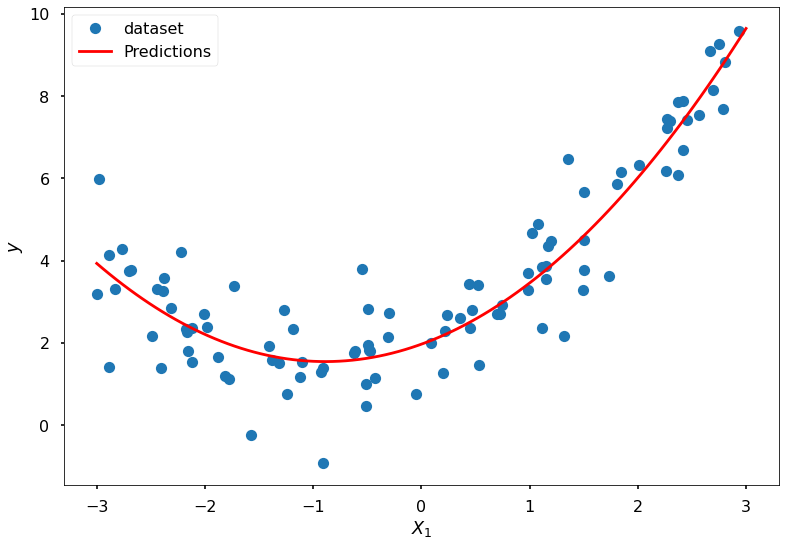

In [21]:
plt.plot(X, y, 'o', label = 'dataset')
plt.plot(X_test, predictions, 'r-', label = 'Predictions')
plt.xlabel('$X_{1}$')
plt.ylabel('$y$')
#plt.title('Gráfica 2')
plt.legend()
plt.show()

## **Desempeño del modelo entrenado**

**¿Cómo saber qué modelo (regresión Lineal o regresión Polinomial) describe mejor el comportamiento de los datos?**

* Definimos el error ***cuadrático medio*** como la diferencia entre el valor estimado por el modelo del valor real.

* Definimos el valor $\hat{y}_{i}$ como el *í-esimo* valor estimado por el modelo. De forma análoga, definimos como $y_{i}$ el *í-esimo* valor real del conjunto de datos (la variable dependiente de los datos).

* ECM = $(\hat{y}_{i} - y_{i})^2$  $ -> $ En machine learning se suele llamar a esta función como la **"función de entrenamiento"**

* El ECM es una medida que permite cuantificar el error individual cometido por el modelo para cada valor estimado y cada valor real. Necesitamos una medida que cuantifique el error general cometido por el modelo en todos puntos.

* Definimos la **función de costo** como el promedio del error cuadrático medio para todo el conjunto de entrenamiento. 

* Recordando: sea $ X = $ $ ${$ x_{1},.....,x_{n} $}$ $ un conjunto de datos. El promedio del conjunto X se define como : $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}$

* FCECM = $\frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i})^2$  $->$ En machine learning tambien se suele llamar a esta función como la función de pérdida (loss function).

In [17]:
def ECM(y_real, y_pred):
  return (y_pred - y_real)**2

def FCECM(y_real, y_pred):
  return np.mean(ECM(y_real, y_pred), axis=0)

In [18]:
preds = modelpoly(X, theta) # Obtenemos y^_{i}, la estimación del modelo

""" Función que realiza el cálculo del ECM y FCECM

    Argumentos:
            X (numpy_array): Variable independiente x_{1}
            y (numpy_array): Variable dependiente y
            preds (numpy_array): Variable predicha dependiente y^
            mode (Bool): Variable que permite imprimir la leyenda con los valores de FCECM
    Return:
           ecm (float): Función de entrenamiento
           fcecm (float): Función de pérdida MSE"""

def CalCoste(y, preds, mode = True):
  ecm = ECM(y_real = y, y_pred = preds) # Cálculamos el error cuadrático  
  fcecm = FCECM(y_real = y, y_pred = preds) # Cálculamos la función de costo
  if(mode):
    print("El costo o pérdida obtenido por el modelo es: {:.4f}".format(fcecm[0]))
  return ecm, fcecm

ecm, fcecm = CalCoste(y, preds)

El costo o pérdida obtenido por el modelo es: 0.7903


### **Overfitting**

Sobregeneralizar es algo que los humanos hacemos muy seguido, el problema es cuando lo hacemos a partir de situaciones muy particulares, cayendo en algunas trampas de no ser lo suficientemente cuidadosos. Este concepto aplica también al aprendizaje máquina y ocurre cuando el modelo no puede capturar las características generales de un conjunto de datos. Sucede generalmente cuando se cuenta con un modelo con más parámetros de los minímos necesarios para describir los datos.

In [19]:
""" Función que realiza el entrenamiento del modelo polinomial de los datos

    Argumentos:
            X (numpy_array): Variable independiente x_{1}
            y (numpy_array): Variable dependiente y
            degree (integer) : Grado del polinomio 
    Return:
           theta (numpy_array): Parámetros del modelo entrenado"""

def train_model(X, y, degree):
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly = poly_features.fit_transform(X)

  pred_poly = lin_reg.fit(X_poly, y)
  theta = [lin_reg.intercept_[0]]
  coefs = lin_reg.coef_[0][:]
  for i in range(len(coefs)):
    theta.append(coefs[i])
  return(theta)

Modelo Polinomial de grado : 14
El costo o pérdida obtenido por el modelo es: 9.8726
Modelo Polinomial de grado : 22
El costo o pérdida obtenido por el modelo es: 10.8844
Modelo Polinomial de grado : 30
El costo o pérdida obtenido por el modelo es: 546.0911


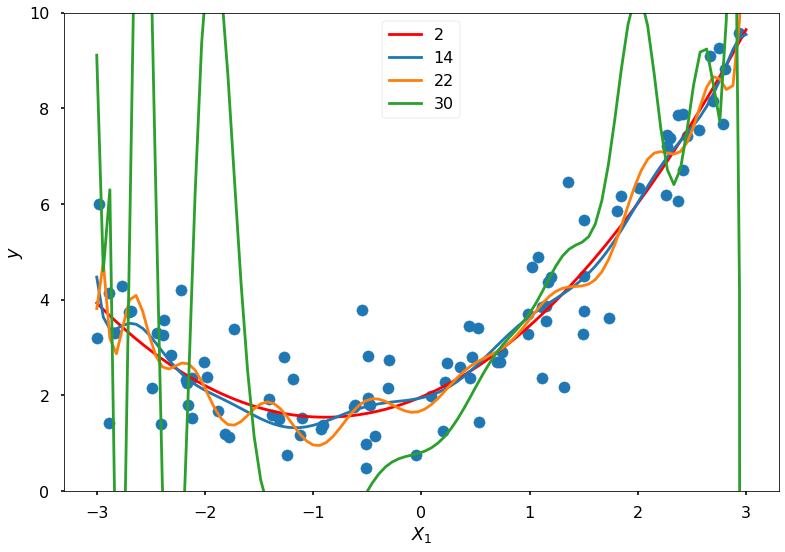

In [23]:
plt.scatter(X, y)
plt.plot(X_test, predictions, 'r-', label = '2')
poly = [14, 22, 30]
for i in poly:
  theta = train_model(X, y, i)
  pred_ = modelpoly(X_test, theta, degree=i)
  print('Modelo Polinomial de grado : '+str(i))
  ecm, fcecm = CalCoste(y, pred_)
  plt.plot(X_test, pred_, '-', label = i)
plt.xlabel('$X_{1}$')
plt.ylabel('$y$')
plt.legend()
plt.ylim((0, 10))
#plt.title('Overfitting - Gráfica 3')
plt.show()

### **Underfitting**

Por el lado contrario, el subajuste ocurre cuando el número de parámetros en el modelo es menor al mínimo requerido para describir los datos o bien se cuenta con poca calidad en los datos. 

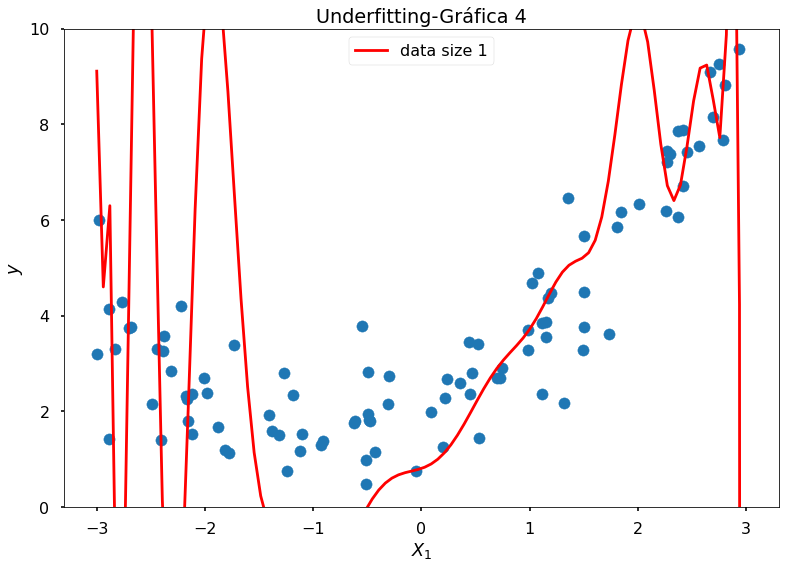

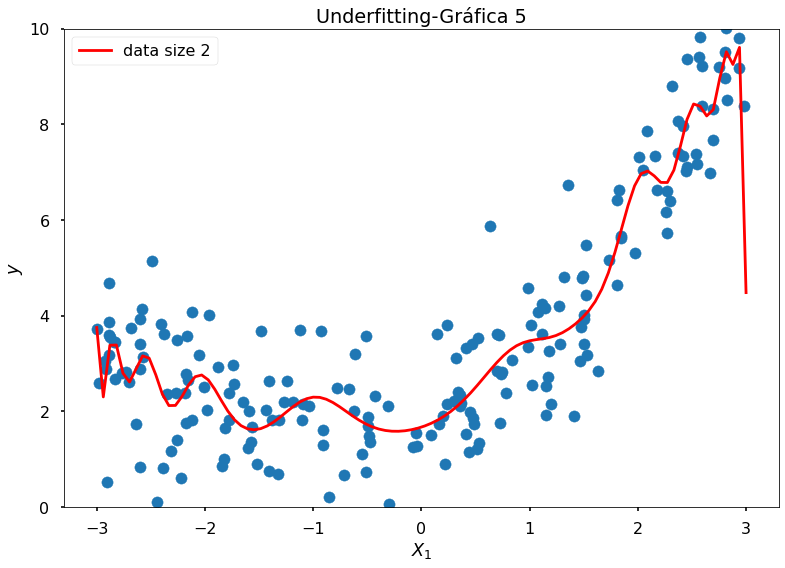

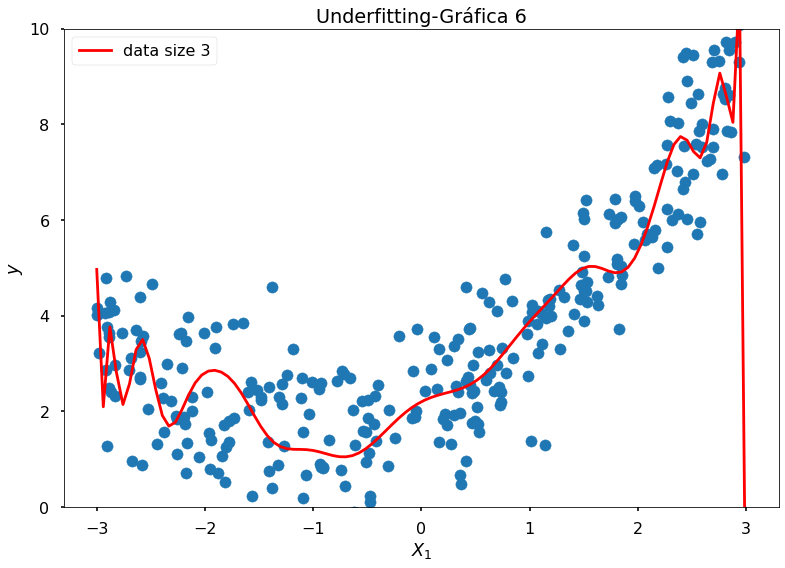

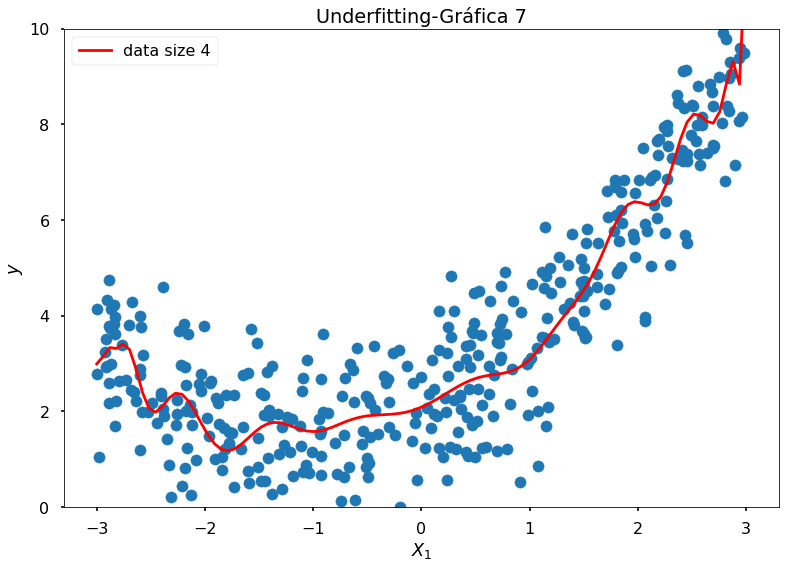

In [24]:
for i in range(1, 5):
  np.random.seed(1)
  X = 6 * np.random.rand(i*m, 1) - 3
  y = 0.5 * X**2 + X + 2 + np.random.randn(i*m, 1)
  plt.scatter(X, y)
  theta = train_model(X, y, 30)
  pred_ = modelpoly(X_test, theta, degree=30)
  plt.plot(X_test, pred_, 'r-', label = 'data size '+str(i))
  plt.xlabel('$X_{1}$')
  plt.ylabel('$y$')
  plt.legend()
  plt.ylim((0, 10))
  plt.title('Underfitting-'+'Gráfica '+str(3+i))
  plt.show()

Modelo Polinomial de grado 2 de tamaño 100%: 
El costo o pérdida obtenido por el modelo es: 9.7456
Modelo Polinomial de grado 2 de tamaño 110%: 
El costo o pérdida obtenido por el modelo es: 9.5229
Modelo Polinomial de grado 4 de tamaño 100%: 
El costo o pérdida obtenido por el modelo es: 9.8057
Modelo Polinomial de grado 4 de tamaño 110%: 
El costo o pérdida obtenido por el modelo es: 9.6102
Modelo Polinomial de grado 22 de tamaño 100%: 
El costo o pérdida obtenido por el modelo es: 10.8844
Modelo Polinomial de grado 22 de tamaño 110%: 
El costo o pérdida obtenido por el modelo es: 9.8934


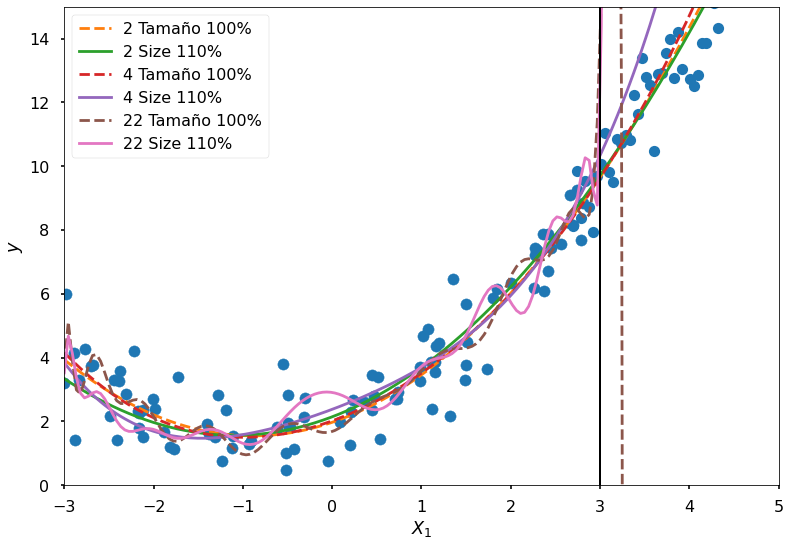

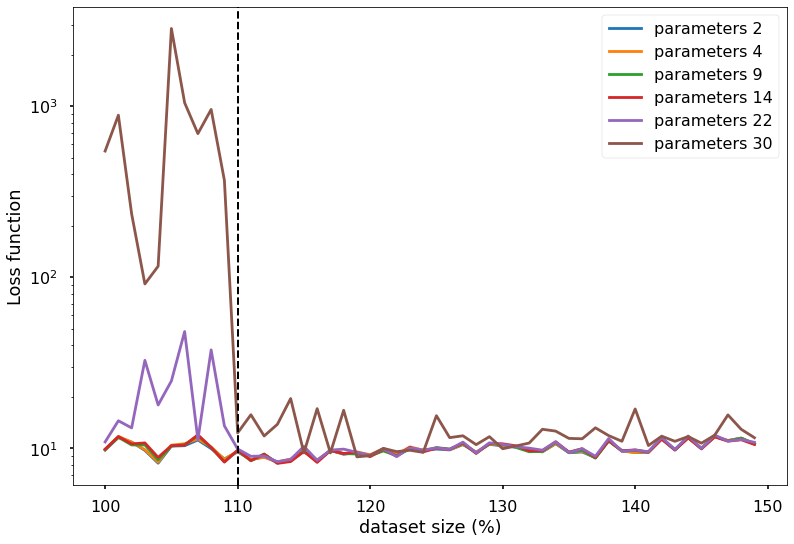

In [30]:
graphs = [2, 4, 22] # Grados de los polinomios para los ajustes

""" Función que realiza el ajuste polinomial de los datos de entrenamiento y 
    evalúa los datos de prueba realizado el gráfico del ajuste para el los dos 
    tamaños predeterminados uno igual al tamaño original y el segundo determinado
    por la variable size por default 110%

    Argumentos:
            X (numpy_array): Variable independiente x_{1}
            y (numpy_array): Variable dependiente y
            X_test (numpy_array): Variable independiente de prueba x_{1}
            degree (list) : Grados de los polinomios a evaluar
            size (integer) : Crecimiento del dataset de entrenamiento por default 10%  
    Return:
           None (Bool): """

def graphmodel(X, y, X_test, degree, size = 0.1):
  m = len(y)

  # Vector de la variable independiente de prueba sobre el cuales se evaluará el modelo
  X_new = np.linspace(-3, 6, m+int(m))
  X_new = np.array(X_new)
  X_new = X_new[np.newaxis,...].T

  y_rigth = 0.5 * X_new[125:]**2 + X_new[125:] + 2 + np.random.randn(len(X_new[125:]), 1)
  plt.plot(X_new[125:], y_rigth, 'o')

  for i in degree:
    theta = train_model(X, y, i)
    pred_ = modelpoly(X_test, theta, degree=i)
    print('Modelo Polinomial de grado '+str(i)+' de tamaño 100%: ')
    ecm, fcecm = CalCoste(y, pred_)
    pred_ = modelpoly(X_new, theta, degree=i)
    plt.plot(X_new, pred_, '--', label = str(i)+' Tamaño 100%')

    X_proof = np.linspace(-3, 3, m+int(m*size))
    X_proof = np.array(X_proof)
    X_proof = X_proof[np.newaxis,...].T

    np.random.seed(1)
    X_ = 6 * np.random.rand(m+int(m*0.1), 1) - 3
    y_ = 0.5 * X_**2 + X_ + 2 + np.random.randn(m+int(m*size), 1)

    theta = train_model(X_, y_, i)
    pred_ = modelpoly(X_proof, theta, degree=i)
    print('Modelo Polinomial de grado '+str(i)+' de tamaño '+"{:.0f}".format(((m+int(m*size))/m)*100)+'%: ')
    ecm, fcecm = CalCoste(y_, pred_)
    pred_ = modelpoly(X_new, theta, degree=i)
    plt.plot(X_new, pred_, '-', label = str(i)+' Size '+"{:.0f}".format(((m+int(m*size))/m)*100)+'%')

# Modelo de regresión polinomial para el dataset de tamaño 100%
np.random.seed(1)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

graphmodel(X, y, X_test, degree = graphs, size = 0.1)

plt.axvline(x=3, ls = '-', c = 'k', linewidth = 2)

plt.xlabel('$X_{1}$')
plt.ylabel('$y$')
#plt.title('Predictions - Gráfica 8')
plt.legend()
plt.ylim((0, 15))
plt.xlim((-3, 5))
plt.show()

""" Función que realiza el ajuste polinomial de los datos de entrenamiento y 
    realiza el gráfico de FCECM para el rango de tamaños del set de datos de 100-150%

    Argumentos:
            X (numpy_array): Variable independiente x_{1}
            y (numpy_array): Variable dependiente y
            X_test (numpy_array): Variable independiente de prueba x_{1}
            degree (integer) : Grado del polinomio 
    Return:
           None (Bool): """

def graphsize(X, y, X_test, degree):
  fcecm_ = []
  polyrange = range(0, 50, 1)
  x_size = []
  for i in polyrange:
    np.random.seed(1)
    size = m + i
    if(i>0):
      X_test = np.linspace(-3, 3, size)
      X_test = np.array(X_test)
      X_test = X_test[np.newaxis,...].T
      X = 6 * np.random.rand(size, 1) - 3
      y = 0.5 * X**2 + X + 2 + np.random.randn(size, 1)
    theta = train_model(X, y, degree)
    pred_ = modelpoly(X_test, theta, degree=degree)
    ecm, fcecm = CalCoste(y, pred_, mode = False)
    x_size.append(size*100/m)
    fcecm_.append(fcecm)
  plt.plot(x_size, fcecm_, '-', label = 'parameters '+str(degree))

poly = [2, 4, 9, 14, 22, 30] # Grado de los polinomios que se estudiarán
for i in poly:
  graphsize(X, y, X_test, degree = i)

plt.xlabel('dataset size (%)')
plt.ylabel('Cost function')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
#plt.title('Underfitting - Gráfica 9')
plt.axvline(x=((m+int(m*0.1))/m)*100, ls = '--', c = 'k', linewidth = 2)
plt.show()

## **Problema de aplicación**

* La empresa $x$ desea conocer la tendencia de los salarios de sus trabajadores en función del nivel de posición que desempeñan en la empresa. Nos han pedido la tarea de encontrar un modelo que mejor logre captar las relaciones entre los datos y así inferir sobre datos futuros.

* Para resolver este problemas vamos a hacer uso de las siguientes librerías de Python: `numpy`, `pandas`, `matplotlib` y `sklearn`

In [ ]:
""" Importamos las librerías y módulos """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 

In [ ]:
""" Importamos el conjunto de datos """
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv') # Leemos el conjunto de datos
X = dataset.iloc[:, 1:2].values # Guardamos en X el nivel de posición de los trabajadores
y = dataset.iloc[:, 2].values # Guardamos en Y el salario en función de los años trabajados

dataset # Mostramos en una tabla los datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


* Vamos a dividir el conjunto de datos en datos de entrenamiento y datos de prueba. El conjunto de entrenamiento desempeña el papel de entrenar el modelo. Los datos de prueba nos sirven para someter al modelo a datos que nunca ha visto y tener una mayor fiabilidad del modelo. 

* Comúnmente, se toma la regla del 80/20 ó 70/30. Datos de entrenamiento y datos de prueba respectivamente.

In [ ]:
""" Dividimos el conjunto de datos en datos de entrenamiento y datos de prueba mediante 
    la función de sklearn train_test_split """
X_train, X_test, y_train, y_test = map(sorted,train_test_split(X, y, test_size=0.2, random_state=0)) # Tomamos test_size=0.2, como el 20% para datos de prueba

""" Construimos un data frame de los conjuntos de entrenamiento y prueba """
dataFrame_train = pd.DataFrame(
    {
    "Position" : [dataset["Position"][pos-1] for pos in sorted(np.squeeze(X_train))],
    "Level" : [pos for pos in np.squeeze(X_train)],
    "Salary" : [sal for sal in np.squeeze(y_train)]
    }
)
dataFrame_test = pd.DataFrame(
    {
    "Position" : [dataset["Position"][pos-1] for pos in sorted(np.squeeze(X_test))],
    "Level" : [pos for pos in np.squeeze(X_test)],
    "Salary" : [sal for sal in np.squeeze(y_test)]
    }
)

In [ ]:
# Observamos el conjunto de entrenamiento
dataFrame_train

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Manager,4,80000
3,Country Manager,5,110000
4,Region Manager,6,150000
5,Partner,7,200000
6,Senior Partner,8,300000
7,CEO,10,1000000


In [ ]:
# Observamos el conjunto de prueba
dataFrame_test

,Position,Level,Salary
0,Senior Consultant,3,60000
1,C-level,9,500000


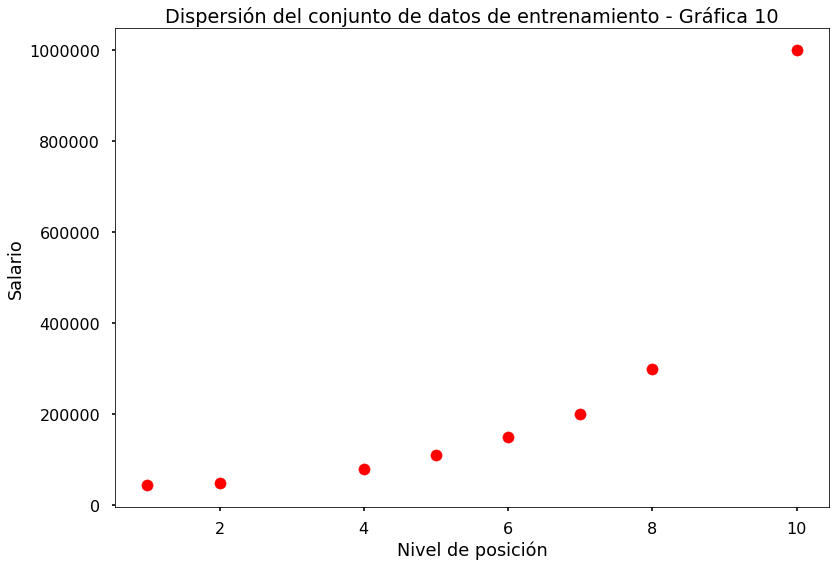

In [ ]:
""" Mostramos la dispersión del conjunto de datos de entrenamiento """
plt.scatter(X_train, y_train, color='red')
plt.title('Dispersión del conjunto de datos de entrenamiento - Gráfica 10')
plt.xlabel('Nivel de posición')
plt.ylabel('Salario')
plt.ticklabel_format(style='plain')
plt.show()

* Vamos a proponer 4 modelos para encontrar el mejor ajuste del conjunto de entrenamiento:

1.   Ajuste Lineal: $y = \theta_{o}+\theta_{1}x$
2.   Ajuste Polinomial grado 2: $y = \theta_{o}+\theta_{1}x+\theta_{2}x^{2}$
3.   Ajuste Polinomial grado 3: $y = \theta_{o}+\theta_{1}x+\theta_{2}x^{2}+\theta_{3}x^{3}$
4.   Ajuste Polinomial grado 4: $y = \theta_{o}+\theta_{1}x+\theta_{2}x^{2}+\theta_{3}x^{3}+\theta_{4}x^{4}$

In [ ]:
""" Importamos las librerias de sklearn para la regresion lineal y polinomial """
from sklearn.linear_model import LinearRegression # Regresion lineal
from sklearn.preprocessing import PolynomialFeatures # Regresion polinomial


""" Función que realiza el ajuste lineal y polinomial de datos de entrenamiento

    Argumentos:
            X_train (numpy_array): Posición de nivel de los trabajadores
            y_train (numpy_array): Salario de los trabajadores
            Linear (Bool): True si el ajuste es lineal
            degree (integer) : Grado del polinomio 
    Return:
           y_pred (numpy_array): Predicción del modelo """

def getModelRegression(X_train_m, Y_train_m, Linear = True, degree = 0): 

  # Si la regresion es lineal
  if Linear:
    linear_reg = LinearRegression() # Instanciamos el objeto que realiza la regresión lineal
    linear_reg.fit(X_train_m, Y_train_m) # Entrenamos el modelo mediante la función fit pasandoles los datos X,y
    return linear_reg.predict(X_train_m), linear_reg  # Retornamos la predicción del modelo
  # Si la regresion es polinomial
  else:
    polinomial_reg = PolynomialFeatures(degree=degree)# Instanciamos el objeto que realiza la regresión polinomial
    X_polinomial = polinomial_reg.fit_transform(X_train_m) # Entrenamos el modelo mediante la función fit pasandoles los datos X,y
    polinomial_reg.fit(X_polinomial, Y_train_m)
    polinomial_reg_lineal = LinearRegression() # Instanciamos el objeto que realiza la regresión polinomial
    polinomial_reg_lineal.fit(X_polinomial, Y_train_m) # Entrenamos el modelo mediante la función fit pasándoles los datos X_polinomial,y
    return polinomial_reg_lineal.predict(X_polinomial), polinomial_reg_lineal,  polinomial_reg  # Retornamos la predicción del modelo


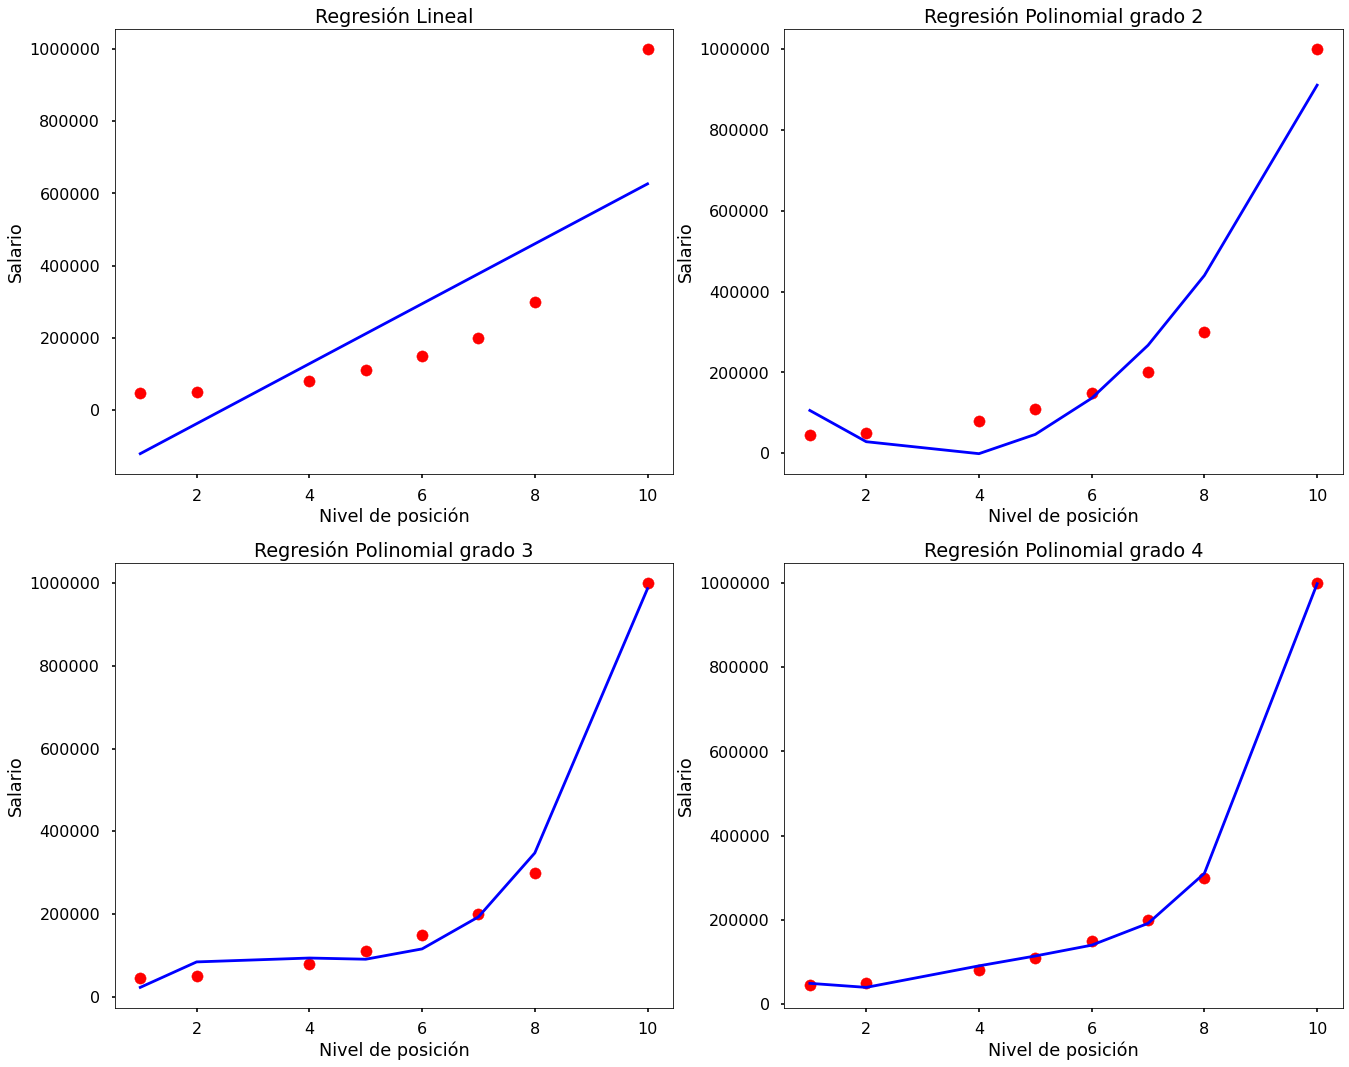

In [ ]:
""" Mostramos los 4 ajustes independientemente y sobrepuestos sobre el conjunto de entrenamiento """

degrees = [2,3,4] # Definimos los grados de los polinomios
subPlotsAxis = [[0,1],[1,0],[1,1]] # Axis de las subgráficas


# Gráfica con varios gráficos
fig, axs = plt.subplots(2, 2, figsize = (22, 18))

# Regresión Lineal
axs[0, 0].plot(X_train, getModelRegression(X_train, y_train)[0], color='blue')
axs[0, 0].scatter(X_train, y_train, color='red')
axs[0, 0].set_title('Regresión Lineal')
axs[0, 0].set(xlabel='Nivel de posición', ylabel='Salario')
axs[0, 0].ticklabel_format(style='plain') 

# Regresion polinómica
for subPlot, degree in zip(subPlotsAxis, degrees):
  axs[subPlot[0], subPlot[1]].plot(X_train, getModelRegression(X_train, y_train, Linear = False, degree = degree)[0], color='blue')
  axs[subPlot[0], subPlot[1]].scatter(X_train, y_train, color='red')
  axs[subPlot[0], subPlot[1]].set_title('Regresión Polinomial grado {}'.format(degree))
  axs[subPlot[0], subPlot[1]].set(xlabel='Nivel de posición', ylabel='Salario')
  axs[subPlot[0], subPlot[1]].ticklabel_format(style='plain') 

# Importante : Para hacer regresión Polinómica los datos tiene que estar ordenados

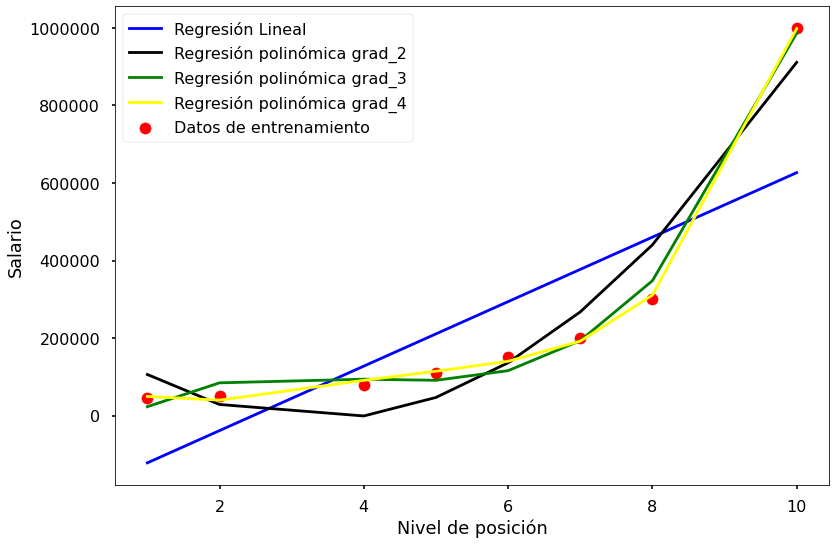

In [ ]:
plt.scatter(X_train, y_train, color = "red", label = "Datos de entrenamiento")
plt.plot(X_train, getModelRegression(X_train, y_train)[0], color = "blue", label = "Regresión Lineal")

colors = ["black", "green", "yellow"]
for degree, color in zip(degrees,colors):
  plt.plot(X_train, getModelRegression(X_train, y_train, Linear = False, degree = degree)[0], color=color, label = "Regresión polinómica grad_{}".format(degree))

plt.legend()
plt.xlabel('Nivel de posición')
plt.ylabel('Salario')
plt.ticklabel_format(style='plain') 
plt.show()


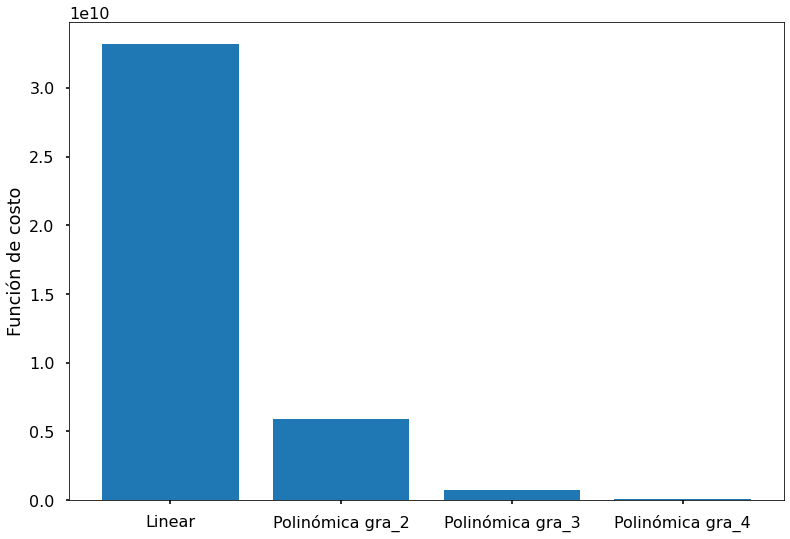

In [ ]:
""" Obtenemos la funcion de costo para los 4 modelos """

fcecm_lineal = FCECM(y_real = y_train, y_pred = getModelRegression(X_train, y_train)[0]) # Cálculamos la funcion de costo
fcecm_poly_deg2 = FCECM(y_real = y_train, y_pred = getModelRegression(X_train, y_train, Linear = False, degree = 2)[0])
fcecm_poly_deg3 = FCECM(y_real = y_train, y_pred = getModelRegression(X_train, y_train, Linear = False, degree = 3)[0])
fcecm_poly_deg4 = FCECM(y_real = y_train, y_pred = getModelRegression(X_train, y_train, Linear = False, degree = 4)[0])

""" Hcemos un gráfico de barras de barras de la función de costo de los cuatro modelos """
fig, ax = plt.subplots()
ax.bar(["Linear","Polinómica gra_2","Polinómica gra_3","Polinómica gra_4"],[fcecm_lineal,fcecm_poly_deg2, fcecm_poly_deg3,fcecm_poly_deg4], align= "center")
plt.ylabel("Función de costo") 
plt.show()

In [ ]:
""" Estimación de los modelos en datos no vistos"""

# Entrenamiento del modelo
y_lineal_train, y_lineal = getModelRegression(X_train, y_train)
y_poly_deg2_train, y_poly_deg2, poly_reg_2 = getModelRegression(X_train, y_train, Linear = False, degree = 2)
y_poly_deg3_train, y_poly_deg3, poly_reg_3 = getModelRegression(X_train, y_train, Linear = False, degree = 3)
y_poly_deg4_train, y_poly_deg4, poly_reg_4 = getModelRegression(X_train, y_train, Linear = False, degree = 4)

# Prueba del modelo del modelo
y_lineal_test = y_lineal.predict(X_test)
y_poly_deg2_test = y_poly_deg2.predict(poly_reg_2.fit_transform(X_test))
y_poly_deg3_test = y_poly_deg3.predict(poly_reg_3.fit_transform(X_test))
y_poly_deg4_test = y_poly_deg4.predict(poly_reg_4.fit_transform(X_test))

""" Mostramos el valor verdadero y el valor estimado por el modelo """
dataFrame_prediction_train = pd.DataFrame(
    {
    "Position" : [dataset["Position"][pos-1] for pos in sorted(np.squeeze(X_train))],
    "Level" : [pos for pos in np.squeeze(X_train)],
    "Real Salary" : [sal for sal in np.squeeze(y_train)],
     "predicted salary Lin" : [sal for sal in np.squeeze(y_lineal_train)],
     "predicted salary poly_2" : [sal for sal in np.squeeze(y_poly_deg2_train)],
     "predicted salary poly_3" : [sal for sal in np.squeeze(y_poly_deg3_train)],
     "predicted salary poly_4" : [sal for sal in np.squeeze(y_poly_deg4_train)]
    }
)

dataFrame_prediction_test = pd.DataFrame(
    {
    "Position" : [dataset["Position"][pos-1] for pos in sorted(np.squeeze(X_test))],
    "Level" : [pos for pos in np.squeeze(X_test)],
    "Real Salary" : [sal for sal in np.squeeze(y_test)],
     "predicted salary Lin" : [sal for sal in np.squeeze(y_lineal_test)],
     "predicted salary poly_2" : [sal for sal in np.squeeze(y_poly_deg2_test)],
     "predicted salary poly_3" : [sal for sal in np.squeeze(y_poly_deg3_test)],
     "predicted salary poly_4" : [sal for sal in np.squeeze(y_poly_deg4_test)]
    }
)

In [ ]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
dataFrame_prediction_train

,Position,Level,Real Salary,predicted salary Lin,predicted salary poly_2,predicted salary poly_3,predicted salary poly_4
0,Business Analyst,1,45000,-122123.287671,105905.963303,22803.481913,49317.361599
1,Junior Consultant,2,50000,-38923.679061,28513.543032,84367.455694,39737.479080
2,Manager,4,80000,127475.538160,-1112.385321,93748.814524,90848.717415
3,Country Manager,5,110000,210675.146771,46654.106597,90862.365404,114333.045126
4,Region Manager,6,150000,293874.755382,136140.235911,115788.607815,139992.916100
5,Partner,7,200000,377074.363992,267346.002621,193175.624673,191766.333262
6,Senior Partner,8,300000,460273.972603,440271.406728,347671.498894,310607.859333
7,CEO,10,1000000,626673.189824,911281.127130,986582.151083,998396.288086


In [ ]:
dataFrame_prediction_test

,Position,Level,Real Salary,predicted salary Lin,predicted salary poly_2,predicted salary poly_3,predicted salary poly_4
0,Senior Consultant,3,60000,44275.929550,-7159.239843,99799.872259,62618.489842
1,C-level,9,500000,543473.581213,654916.448231,603924.313392,554488.616835
